K-means classification is very useful for condensing a wide spread of continuous data into a few distict categories. K-means itself identifies the nature and cohesiveness of said categories. 

Try to sort location coordinates into regions.
Try to sort patients by commonalities.

In [1]:
import  numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import pairwise_distances_argmin

First, I run K-Means clustering on the geoData coordinate dataset. This allows us to collapse a wide range of locations into a handful of different categories.

The closer the silhouette score is to 1, the better the clusters.

For 3 clusters the silhouette score is: 0.908


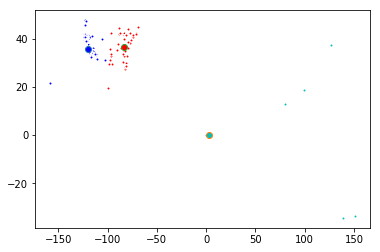

In [2]:
geo = pd.read_csv("geoData.csv")

# will classify only by latitude and longitude data, so drop the others
geo.drop(['school_code', 'countyMatch', 'isSchool'],inplace=True,axis=1) 

# convert geo dataframe to np array so it plays nice with scikit
dat_data = geo.values
n_clusters = 3

km = KMeans(n_clusters) 
result = km.fit_predict(dat_data)

centroids = km.cluster_centers_ #get the center points of each cluster
dat_label = pairwise_distances_argmin(dat_data, centroids)
colors = ['b', 'c', 'r'] #colors for our three clusters

silhouette_avg = silhouette_score(dat_data, result)
print("For", n_clusters, "clusters the silhouette score is: {:0.3f}".format(silhouette_avg))

for k, col in zip(range(n_clusters), colors):
    mems = dat_label == k
    cent = centroids[k]
    plt.plot(dat_data[mems, 0], dat_data[mems,1], 'w', markerfacecolor=col, marker='.')
    plt.plot(cent[0], cent[1], 'o', markerfacecolor=col, markersize=6)

plt.show()

I picked 3 on a whim, but a silhouette score of 0.908 is pretty darn good. The graph shows us two distinct clusters (red and blue), with a smattering of outliers being grouped into green.

Closer analysis of these outliers, to determine if they should be disgarded or merely considered separately, is advised.

We drop all datapoints with extreme longitudinal outliers (longitude > -10) and try again.

For 2 clusters the silhouette score is: 0.907


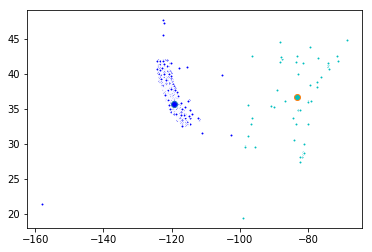

In [3]:
trimGeo = geo.drop(geo[geo['longitude'] > -10].index)

# convert geo dataframe to np array so it plays nice with scikit
dat_data = trimGeo.values
n_clusters = 2

km = KMeans(n_clusters) 
result = km.fit_predict(dat_data)

centroids = km.cluster_centers_ #get the center points of each cluster
dat_label = pairwise_distances_argmin(dat_data, centroids)
colors = ['b', 'c', 'r', 'm'] #colors for our clusters

silhouette_avg = silhouette_score(dat_data, result)
print("For", n_clusters, "clusters the silhouette score is: {:0.3f}".format(silhouette_avg))

for k, col in zip(range(n_clusters), colors):
    mems = dat_label == k
    cent = centroids[k]
    plt.plot(dat_data[mems, 0], dat_data[mems,1], 'w', markerfacecolor=col, marker='.')
    plt.plot(cent[0], cent[1], 'o', markerfacecolor=col, markersize=6)

plt.show()

Now we are reduced to two distinct clusters with a slightly higher silhouette now that the outliers are gone. Seeing as this data is graphed by longitude vs latitude, it may be worth identifying where these points fall on an actual map and determining the different regional traits of each cluster (eg county? neighborhood?).

The next form of K-means analysis will be done on the StudentData.

StudentData Features:
- n - number of students
- nMMR - number of students reporting MMR vaccination
- nDTP - ''' DTP vaccine
- nPolio - ''' polio vaccine
- nPBE - number of students citing personal beliefs exemption from vaccines
- nPME - ''' medical exemption from vaccines
- COUNTY - county where row data was recorded
- SCHOOL - school '''
- School Type - public or private institution
- year - year of polling

PertusisCases Features - 
- number of cases and incident rates of pertussis per year
- county of each statistic

The only common features connecting vaccination circumstance to actual pertussis outbreaks are the county and year in which each form of data was recorded.

One comparison will be done to determine the likelihood of vaccination vs exemption per county. Another will determine those results compared to the actual rate of outbreak.

We must sort the counties by the likelihood of their children having recieved vaccines. We may use K-means clustering 
Perhaps percentage analysis would be more effective. 

What can K-means do? K-means turns continuous into categorical.

StudentData numeric variables - counts of vaccinations, exemptions.

Pertusis numericals - rates and incidents. No. of rates and no. of incidents obviously correlated. Year is also numerical. Can determine which years were the worst.

Let's do things and see how they work out.

Want to predict which counties are at high risk for a given year, given historical trends and that year's immunization rates.

For 3 clusters the silhouette score is: 0.560


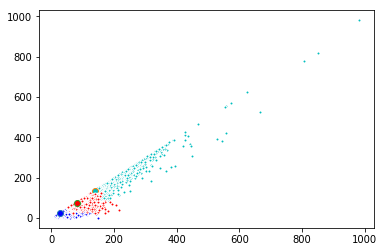

In [4]:
student = pd.read_csv("StudentData.csv", encoding = 'latin1')
#student.columns
student.drop(['schoolType', 'COUNTY', 'SCHOOL', 'school_code'],inplace=True,axis=1) 

# convert geo dataframe to np array so it plays nice with scikit
dat_data = student.values
n_clusters = 3

km = KMeans(n_clusters) 
result = km.fit_predict(dat_data)

centroids = km.cluster_centers_ #get the center points of each cluster
dat_label = pairwise_distances_argmin(dat_data, centroids)
colors = ['b', 'c', 'r'] #colors for our three clusters

silhouette_avg = silhouette_score(dat_data, result)
print("For", n_clusters, "clusters the silhouette score is: {:0.3f}".format(silhouette_avg))

for k, col in zip(range(n_clusters), colors):
    mems = dat_label == k
    cent = centroids[k]
    plt.plot(dat_data[mems, 0], dat_data[mems,1], 'w', markerfacecolor=col, marker='.')
    plt.plot(cent[0], cent[1], 'o', markerfacecolor=col, markersize=6)

plt.show()